# LUNG CANCER PREDICTION

1.IMPORT THE LIBRARIES:

In [48]:
import pandas as pd
import numpy as np                     
import seaborn as sns                 
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                       
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split


2.IMPORT THE DATASET:

In [29]:
data = pd.read_csv('Lung Cancer.csv')

3.PRINTING THE FIRST 5 ROWS OF THE DATASET:

In [30]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [31]:
data.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


4.CORRELATION PLOT:

<AxesSubplot:title={'center':'Correlation Matrix'}>

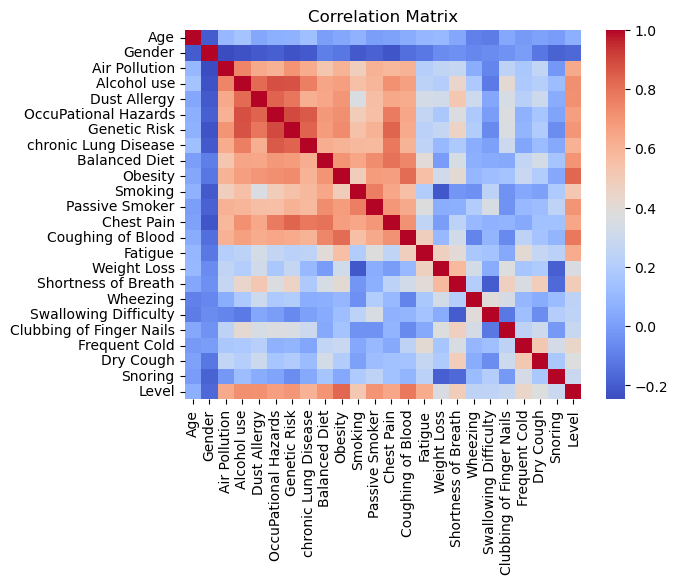

In [47]:
corr=data.corr()
plt.title("Correlation Matrix")
sns.heatmap(corr, cmap='coolwarm')

It can be inferred from the correlation plot that obesity, coughing of blood, alcohol us, genetic risk, passive smoker contributes to the high chances of having lung cancer

5.ASSIGNING NUMERICAL VALUE TO CLASS LABELS:

In [33]:
print('Cancer Levels: ', data['Level'].unique())
data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', data['Level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


6.ASSIGNING INDEPENDENT AND DEPENDENT VARIABLE:

In [34]:
target = data['Level']
train = data.drop('Level',1)

In [35]:
train = pd.get_dummies(train)

In [36]:
target= pd.get_dummies(target)

7.SPLITTING THE DATASET:

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

8.IMPORTING KNEIGHBORS CLASSIFIER:

In [39]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
classifier_knn = KNeighborsClassifier(n_neighbors = 3) 
classifier_knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

9.PREDICTION:

In [40]:
y_pred = classifier_knn.predict(X_val) 

10.ACCURACY SCORE:

In [42]:
print("Accuracy:", metrics.accuracy_score(y_val, y_pred)) 

Accuracy: 0.995


11.PREDICTION ON NEW DATA:

In [43]:
new_data = pd.DataFrame({
      "Age":[35],"Gender":[1],
    "Air Pollution":[4],"Alcohol use":[5],"Dust Allergy":[6],"OccuPational Hazards":[5], "Genetic Risk":[5],
    "chronic Lung Disease":[4], "Balanced Diet":[6],"Obesity":[7],"Smoking":[2],
    "Passive Smoker":[3],"Chest Pain":[4],"Coughing of Blood":[8],"Fatigue":[8],"Weight Loss":[7],
    "Shortness of Breath":[9],"Wheezing":[2],"Swallowing Difficulty":[1],
    "Clubbing of Finger Nails":[4],"Frequent Cold":[6],"Dry Cough":[7],"Snoring":[2]

})


# Predict using the trained model
prediction = classifier_knn.predict(new_data)

# 5. Evaluate the prediction
print("Predicted output:", prediction)

Predicted output: [[0 0 1]]


In [44]:
new_data = pd.DataFrame({
      "Age":[38],"Gender":[2],
    "Air Pollution":[5],"Alcohol use":[2],"Dust Allergy":[3],"OccuPational Hazards":[1], "Genetic Risk":[2],
    "chronic Lung Disease":[3], "Balanced Diet":[5],"Obesity":[2],"Smoking":[2],
    "Passive Smoker":[5],"Chest Pain":[1],"Coughing of Blood":[3],"Fatigue":[1],"Weight Loss":[1],
    "Shortness of Breath":[1],"Wheezing":[1],"Swallowing Difficulty":[1],
    "Clubbing of Finger Nails":[3],"Frequent Cold":[2],"Dry Cough":[4],"Snoring":[2]

})


# Predict using the trained model
prediction = classifier_knn.predict(new_data)

# 5. Evaluate the prediction
print("Predicted output:", prediction)

Predicted output: [[1 0 0]]


Thus, the model provided an accuracy score of 0.995 and the model correctly predicted the output on the new data provided to the model.